### Objective of the problem: 
The objective of the problem is to predict the values of credit_amount variable as per serial number variable. Please view the sample submissions file for better understanding. The solution must be presented in the form of a csv with predicted values of the response variable credit_amount along with it’s corresponding serial number.

### Features:
The data given is of credit records of individuals with certain attributes. Please go through following to understand the variables involved: 
1. serial number : unique identification key 

2. account_info : Categorized details of existing accounts of the individuals. The balance of money in account provided is stated by this variable 

3. purpose: This variable signifies why the loan was taken 
A40 signifies that the loan is taken to buy a new car 
A46 signifies that the loan is taken for education 
A47 signifies that the loan is taken for vacation 
A48 signifies that the loan is taken for re skilling 
A49 signifies that the loan is taken for business and establishment 
A410 signifies other purposes 

4. savings_account: This variable signifies details of the amount present in savings account of the individual: 
A61 signifies that less than 100 units (excluding 100) of currency is present 
A62 signifies that greater than 100 units (including 100) and less than 500 (excluding 500) units of currency is present 
A63 signifies that greater than 500 (including 500) and less than 1000 (excluding 1000) units of currency is present. 
A64 signifies that greater than 1000 (including 1000) units of currency is present. 
A65 signifies that no savings account details is present on record 

5. **employment_st: Catergorical variable that signifies the employment status of everyone who has been alloted loans 
A71 signifies that the individual is unemployed 
A72 signifies that the individual has been employed for less than a year 
A73 signifies that the individual has been employed for more than a year but less than four years 
A74 signifies that the individual has been employed more than four years but less than seven years 
A75 signifies that the individual has been employed for more than seven years 

6. gurantors: Categorical variable which signifies if any other individual is involved with an individual loan case 
A101 signifies that only a single individual is involved in the loan application 
A102 signifies that one or more co-applicant is present in the loan application 
A103 signifies that guarantor are present. 

7. resident_since: Numerical variable that signifies for how many years the applicant has been a resident. 

8. property_type: This qualitative variable defines the property holding information of the individual 
A121 signifies that the individual holds real estate property 
A122 signifies that the individual holds a building society savings agreement or life insurance 
A123 signifies that the individual holds cars or other properties 
A124 signifies that property information is not available 

9. age: Numerical variable that signifies age in number of years 

10. installment_type: This variable signifies other installment types taken 
A141 signifies installment to bank 
A142 signifies installment to outlets or stores 
A143 signifies that no information is present 

11. housing_type: This is a categorical variable that signifies which type of housing does a applicant have. 
A151 signifies that the housing is on rent 
A152 signifies that the housing is owned by the applicant 
A153 signifies that no loan amount is present on the housing and there is no expense for the housing) 

12. credits_no: Numerical variable for number of credits taken by the person 

13. job_type: Signifies the employment status of the person 
A171 signifies that the individual is unemployed or unskilled and is a non-resident 
A172 signifies that the individual is unskilled but is a resident 
A173 signifies that the individual is a skilled employee or official 
A174 signifies that the individual is involved in management or is self-employed or a 
highly qualified employee or officer 

14. liables: Signifies number of persons dependent on the applicant 

15. telephone: Signifies if the individual has a telephone or not 
A191 signifies that no telephonic records are present 
A192 signifies that a telephone is registered with the customer’s name 

16.foreigner: Signifies if the individual is a foreigner or not (considering the country of residence of the bank) 
A201 signifies that the individual is a foreigner 
A202 signifies that the individual is a resident 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [2]:
df=pd.read_csv('train.csv')
df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,...,4,A124,53,A143,A153,2,A173,2,A191,A201


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Dataset

In [3]:
df1=df.copy()
df1.shape

(700, 25)

In [4]:
df1.columns

Index(['serial number', 'account_info', 'duration_month', 'Loan', 'Regularity',
       'Purpose', 'credit_amount', 'savings_account', 'Saving Account',
       'employment_st', 'Salary', 'investment', 'Gender', 'Status',
       'gurantors', 'resident_since', 'property_type', 'age',
       'installment_type', 'housing_type', 'credits_no', 'job_type', 'liables',
       'telephone', 'foreigner'],
      dtype='object')

### Checking for Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     700 non-null    int64  
 1   account_info      427 non-null    object 
 2   duration_month    700 non-null    int64  
 3   Loan              700 non-null    object 
 4   Regularity        700 non-null    object 
 5   Purpose           700 non-null    object 
 6   credit_amount     700 non-null    int64  
 7   savings_account   700 non-null    object 
 8   Saving Account    580 non-null    float64
 9   employment_st     700 non-null    object 
 10  Salary            700 non-null    int64  
 11  investment        700 non-null    float64
 12  Gender            700 non-null    object 
 13  Status            700 non-null    object 
 14  gurantors         700 non-null    object 
 15  resident_since    700 non-null    int64  
 16  property_type     700 non-null    object 
 1

#### 1. For getting the statistical summary of numerical variables we use the describe()

In [6]:
df1.describe()

,serial number,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.00000,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,202.21688,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,1.00000,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,175.75000,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,350.50000,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,525.25000,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,700.00000,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.


#### 2. For getting the statistical summary of categorical features we use the describe(include = object)

In [7]:
df1.describe(include = object)

,account_info,Loan,Regularity,Purpose,savings_account,employment_st,Gender,Status,gurantors,property_type,installment_type,housing_type,job_type,telephone,foreigner
count,427,700,700,700,700,700,700,700,700,700,700,700,700,700,700
unique,3,2,2,5,5,5,2,3,3,4,3,3,4,2,2
top,SILVER,YES,YES,A40,A61,A73,M,Umarried,A101,A123,A143,A152,A173,A191,A201
freq,197,642,434,575,427,244,484,386,633,238,570,503,445,422,674


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- It is visible that some of the variables have count less than total number of observations which indicates the presence of missing values.

### Checking For Null Values & Duplicates

In [8]:
nv=df1.isnull().sum()
nv[nv>1]

account_info      273
Saving Account    120
dtype: int64

In [9]:
df1.duplicated().sum()

0

###  Finding the percentage of missing values in each column. If the percentage is more than 0, depict the column name and their corresponding percentage on a bar chart.

In [10]:
percent_missing= df1.isnull().sum() * 100 / len(df)
d3=percent_missing[(percent_missing.values>0)]
d3

account_info      39.000000
Saving Account    17.142857
dtype: float64

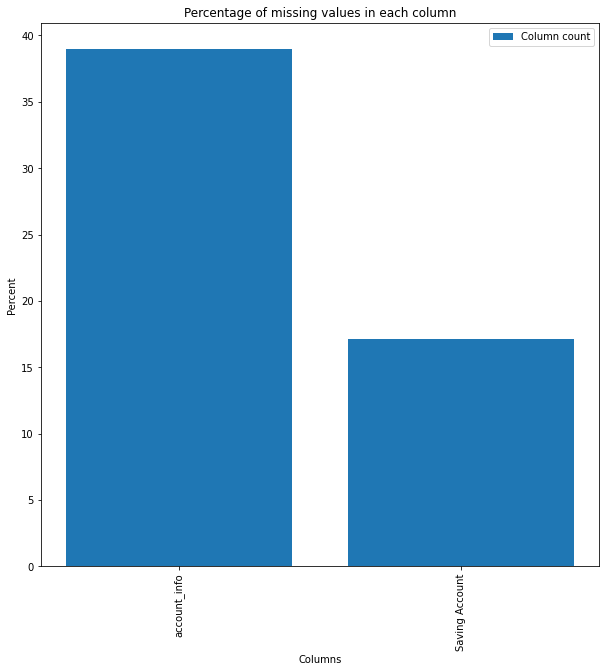

In [11]:
plt.figure(figsize=(10,10))
plt.bar(d3.index,d3.values,label='Column count')
plt.xlabel('Columns')
plt.ylabel('Percent')
plt.legend()
plt.xticks(rotation=90)
plt.title('Percentage of missing values in each column')
plt.show()

### Handling Null Values

In [12]:
df1['account_info'].value_counts()

SILVER    197
BRONZE    183
GOLD       47
Name: account_info, dtype: int64

In [13]:
df1['Saving Account'].value_counts()

90.0      9
81.0      9
87.0      8
34.0      8
98.0      8
         ..
972.0     1
227.0     1
2424.0    1
202.0     1
709.0     1
Name: Saving Account, Length: 246, dtype: int64

In [14]:
df1['Saving Account'].mean()

265.20862068965516

In [15]:
df1['Saving Account'].describe()

count     580.000000
mean      265.208621
std       569.396113
min         1.000000
25%        34.000000
50%        70.000000
75%       137.500000
max      3791.000000
Name: Saving Account, dtype: float64

In [16]:
df1['account_info'].fillna('SILVER',inplace=True)
df1['Saving Account'].fillna(265.208621,inplace=True)

### Univariate Data Analysis

In [17]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


serial number
1      1
471    1
463    1
464    1
465    1
      ..
235    1
236    1
237    1
238    1
700    1
Name: serial number, Length: 700, dtype: int64

account_info
SILVER    470
BRONZE    183
GOLD       47
Name: account_info, dtype: int64

duration_month
12    137
24    126
18     81
6      58
36     58
15     40
48     34
9      33
30     24
10     22
21     17
60     10
42      8
27      8
11      6
7       5
14      4
8       4
20      3
33      3
4       3
39      3
54      2
45      2
13      2
16      1
47      1
22      1
28      1
5       1
26      1
72      1
Name: duration_month, dtype: int64

Loan
YES    642
NO      58
Name: Loan, dtype: int64

Regularity
YES    434
NO     266
Name: Regularity, dtype: int64

Purpose
A40     575
A49      68
A46      40
A410     10
A48       7
Name: Purpose, dtype: int64

credit_amount
1262    3
1478    3
2333    2
1424    2
2978    2
       ..
915     1
1595    1
4605    1
1185    1
1905    1
Name: credit_amount, Length: 662, dtype

### Segregating numbers and categorical data

#### Numerical Columns

In [18]:
df1_numerical= df1.select_dtypes(include='number')

In [19]:
df1_numerical.dtypes.value_counts()

int64      8
float64    2
dtype: int64

In [20]:
print(df1_numerical.columns)

Index(['serial number', 'duration_month', 'credit_amount', 'Saving Account',
       'Salary', 'investment', 'resident_since', 'age', 'credits_no',
       'liables'],
      dtype='object')


#### Boxplots

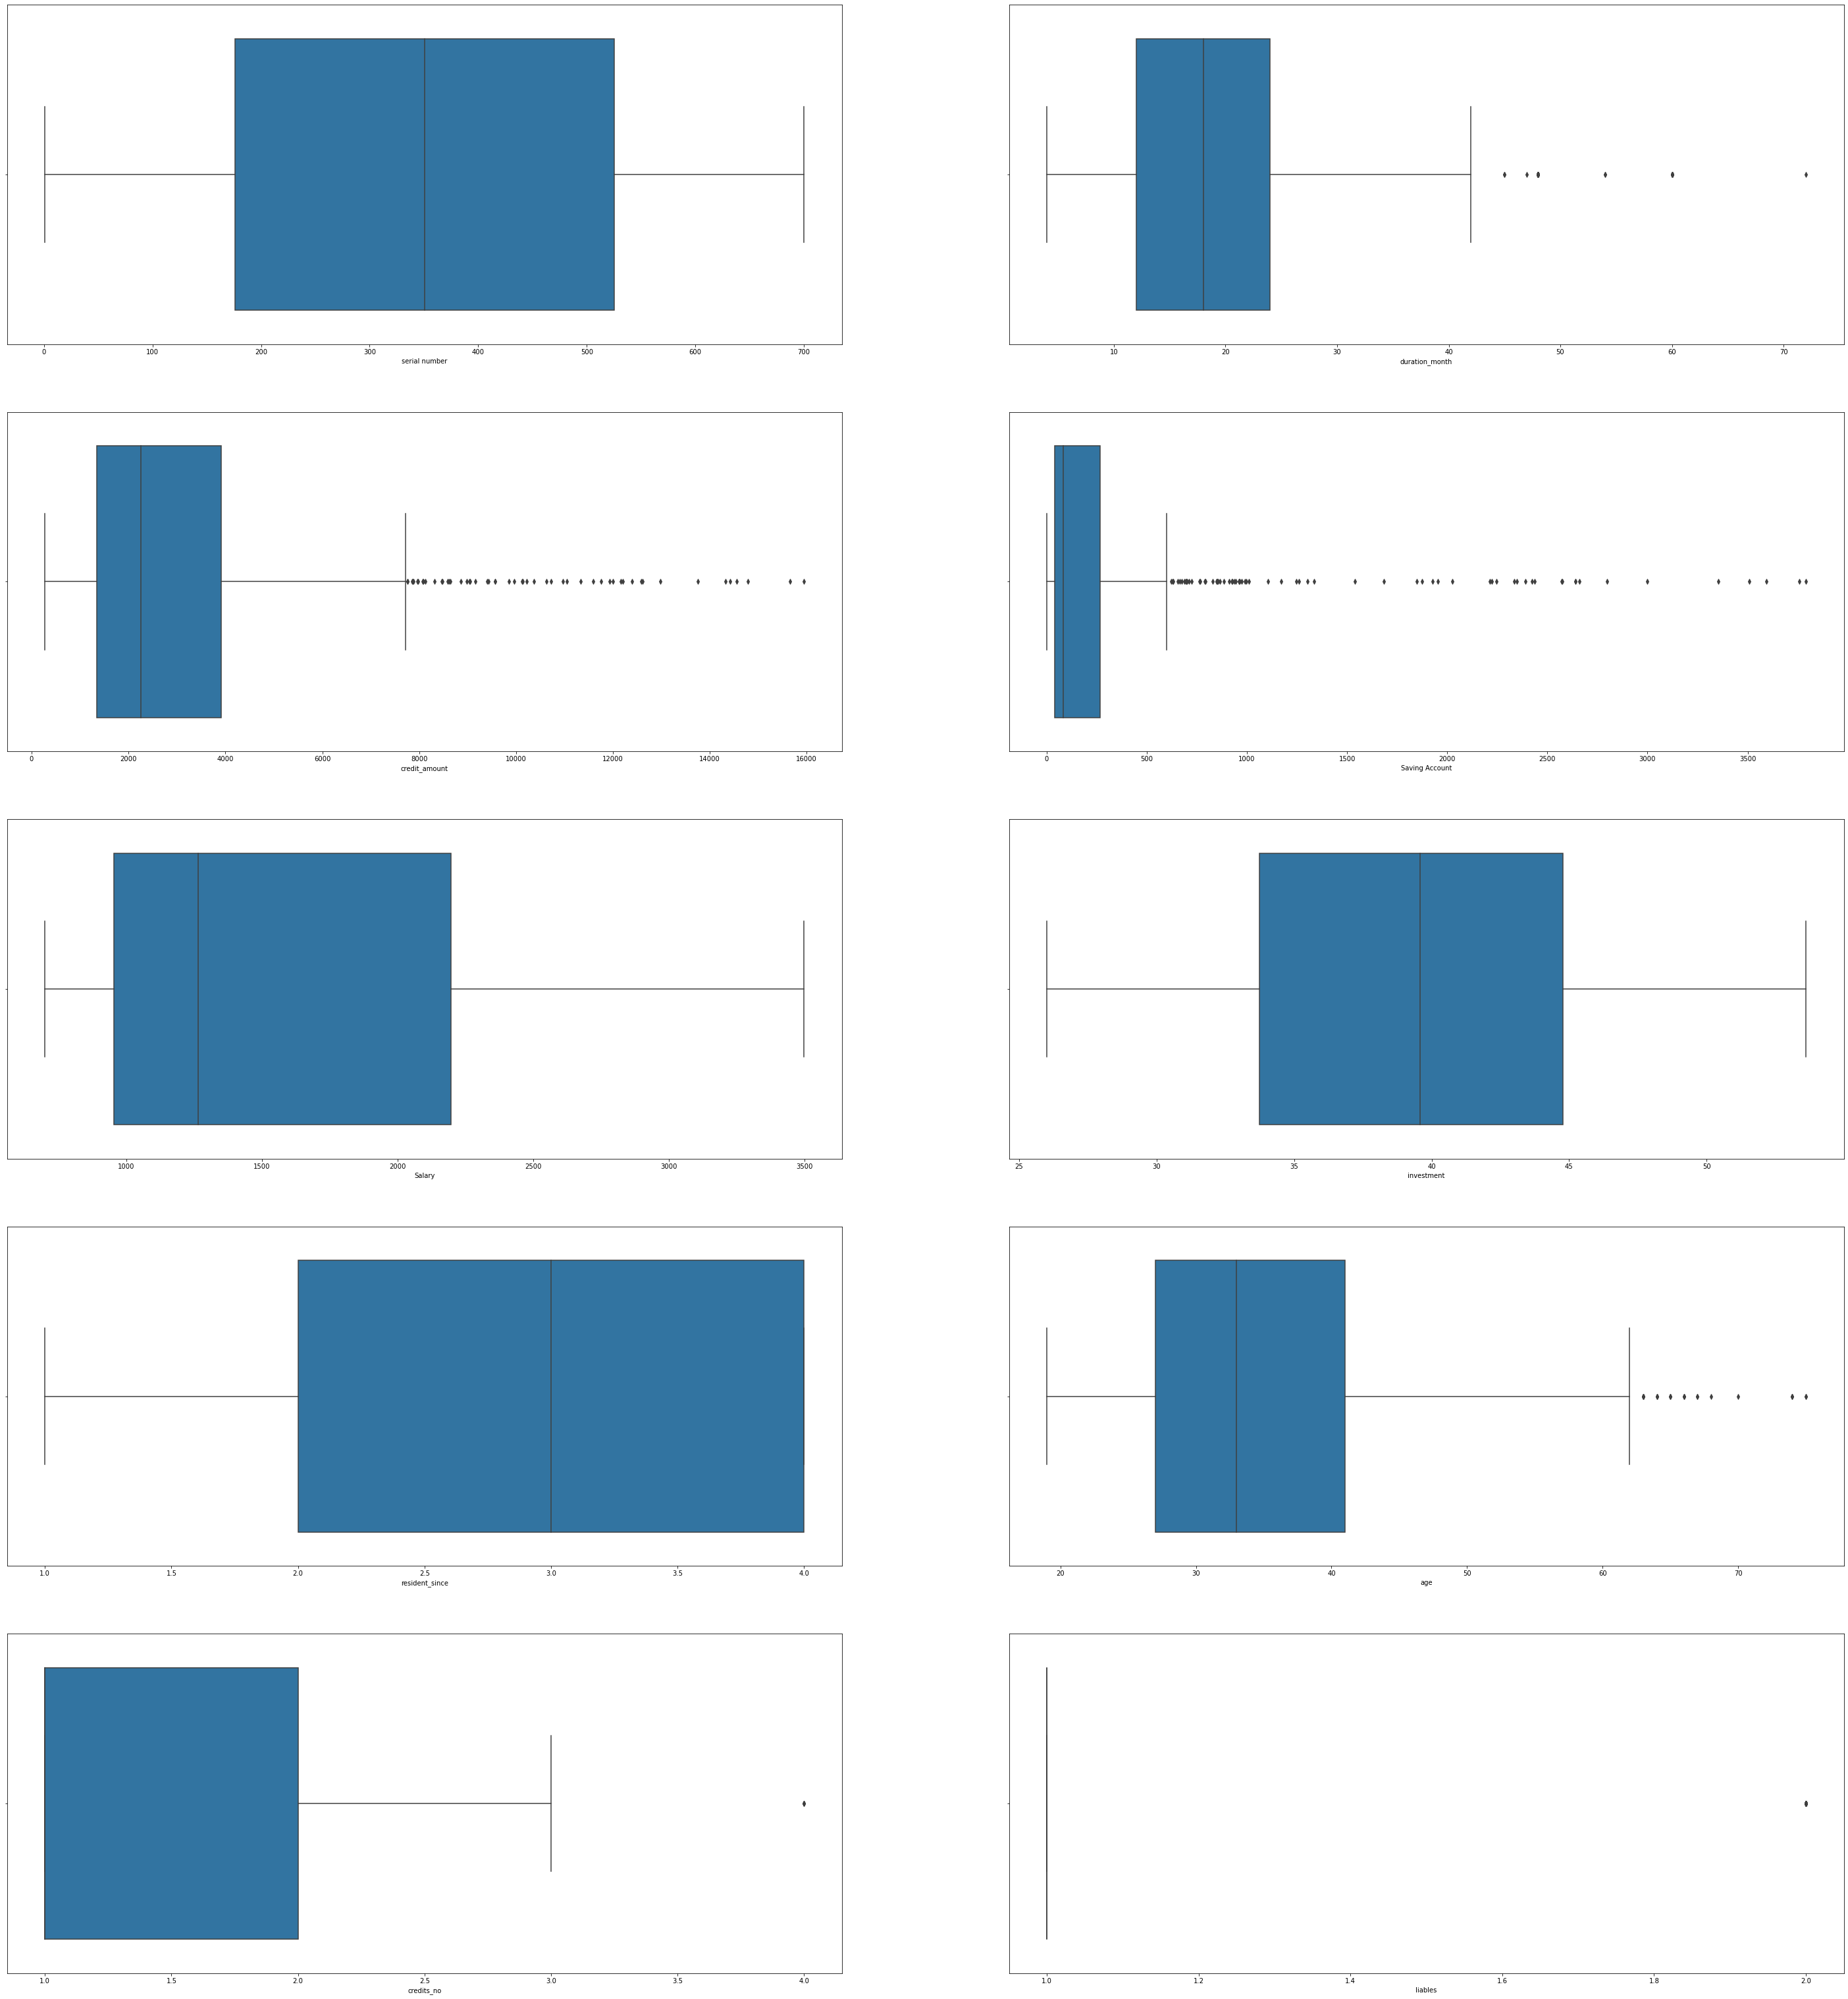

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (50, 55))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

#### Histogram

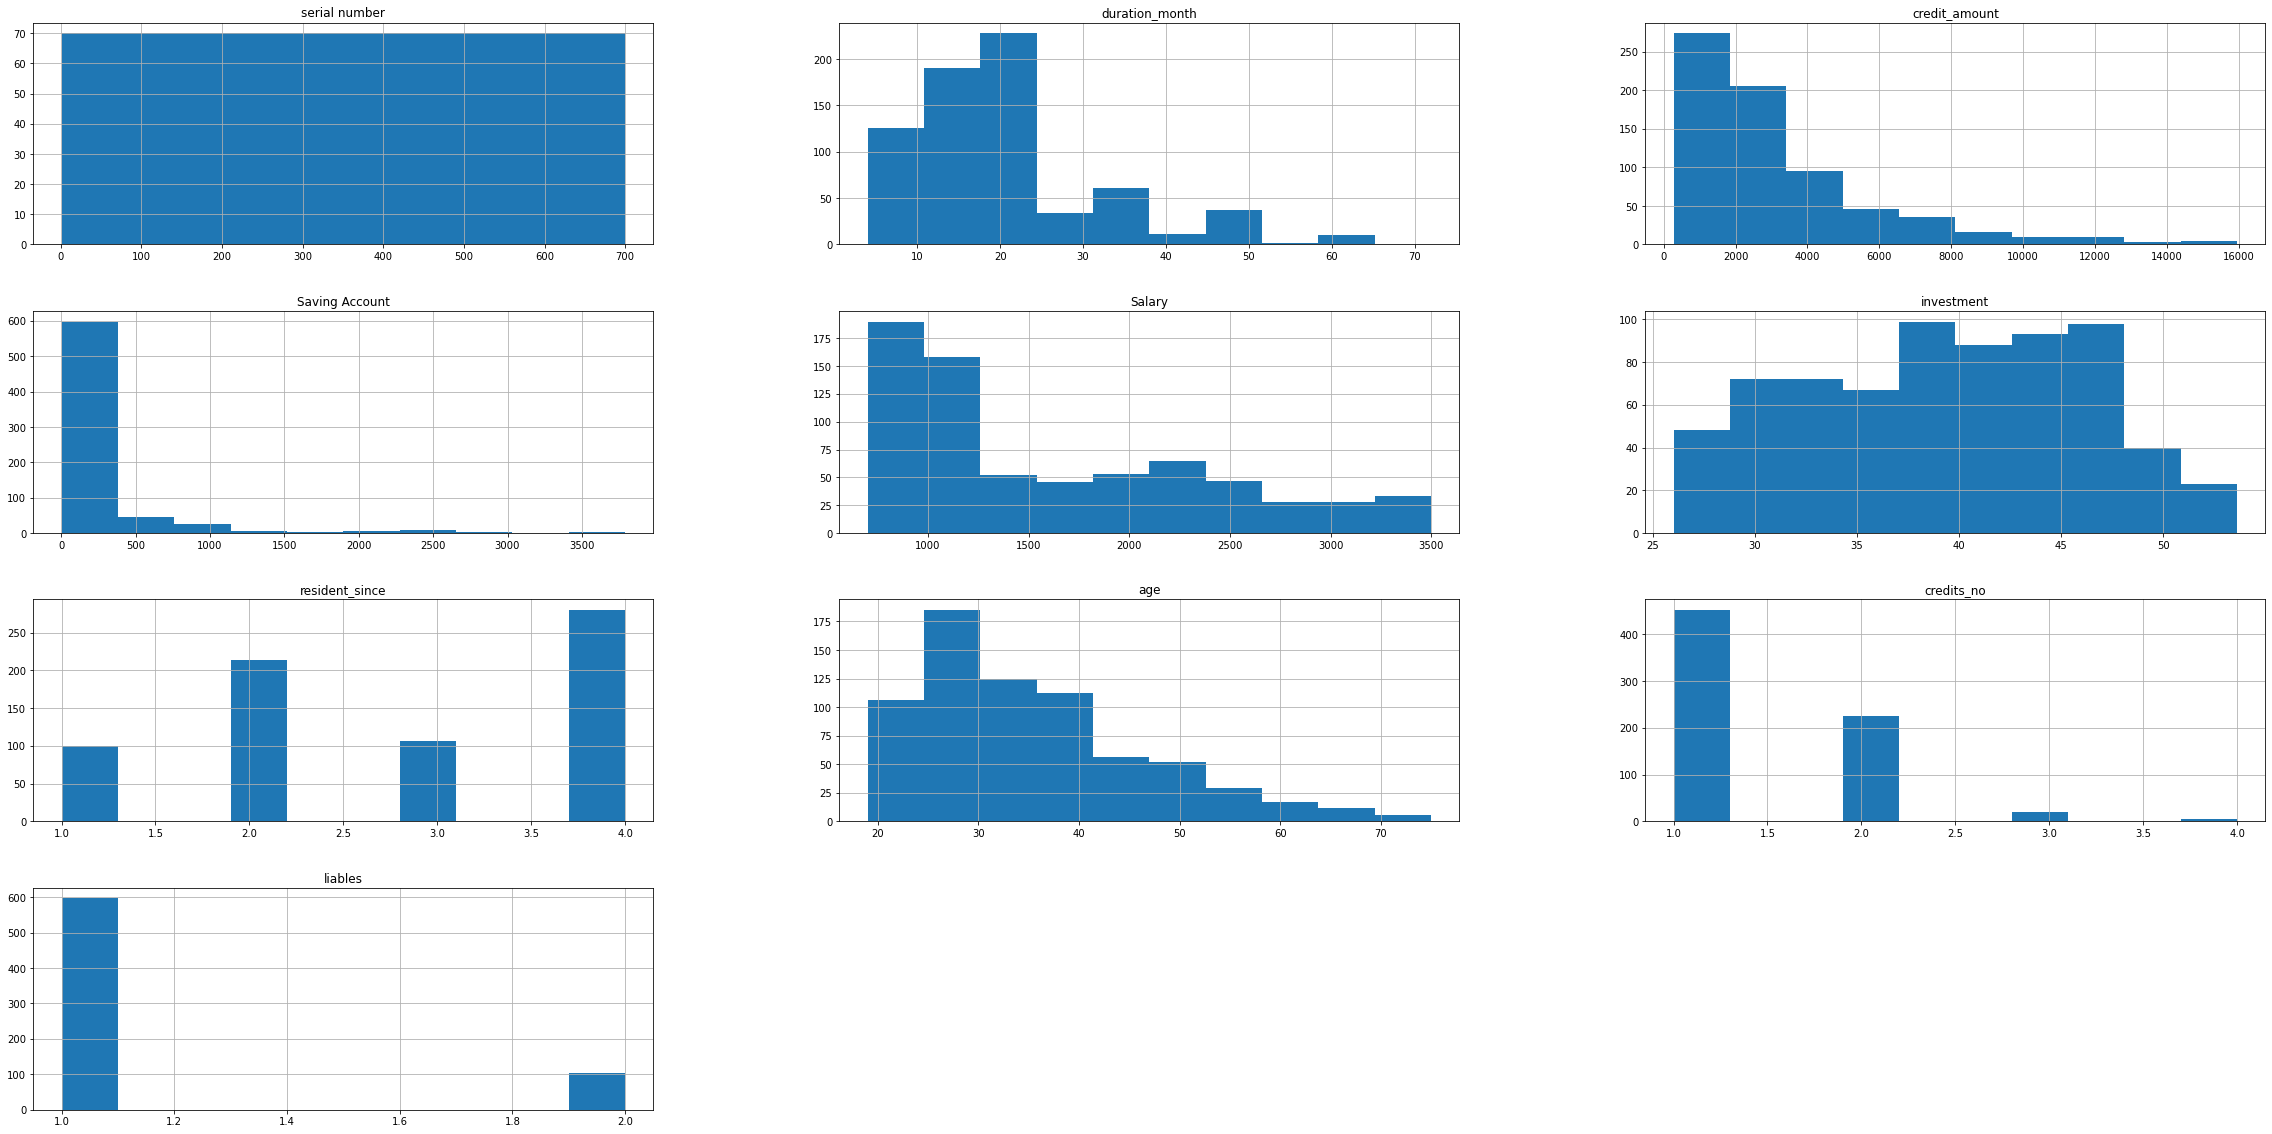

In [22]:
a=df1_numerical.hist(figsize=(40,20))

#### Categorical Columns

In [23]:
df1_categorical= df1.select_dtypes(exclude='number')

In [24]:
df1_categorical.dtypes.value_counts()

object    15
dtype: int64

In [25]:
print(df1_categorical.columns)

Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')


#### Countplots

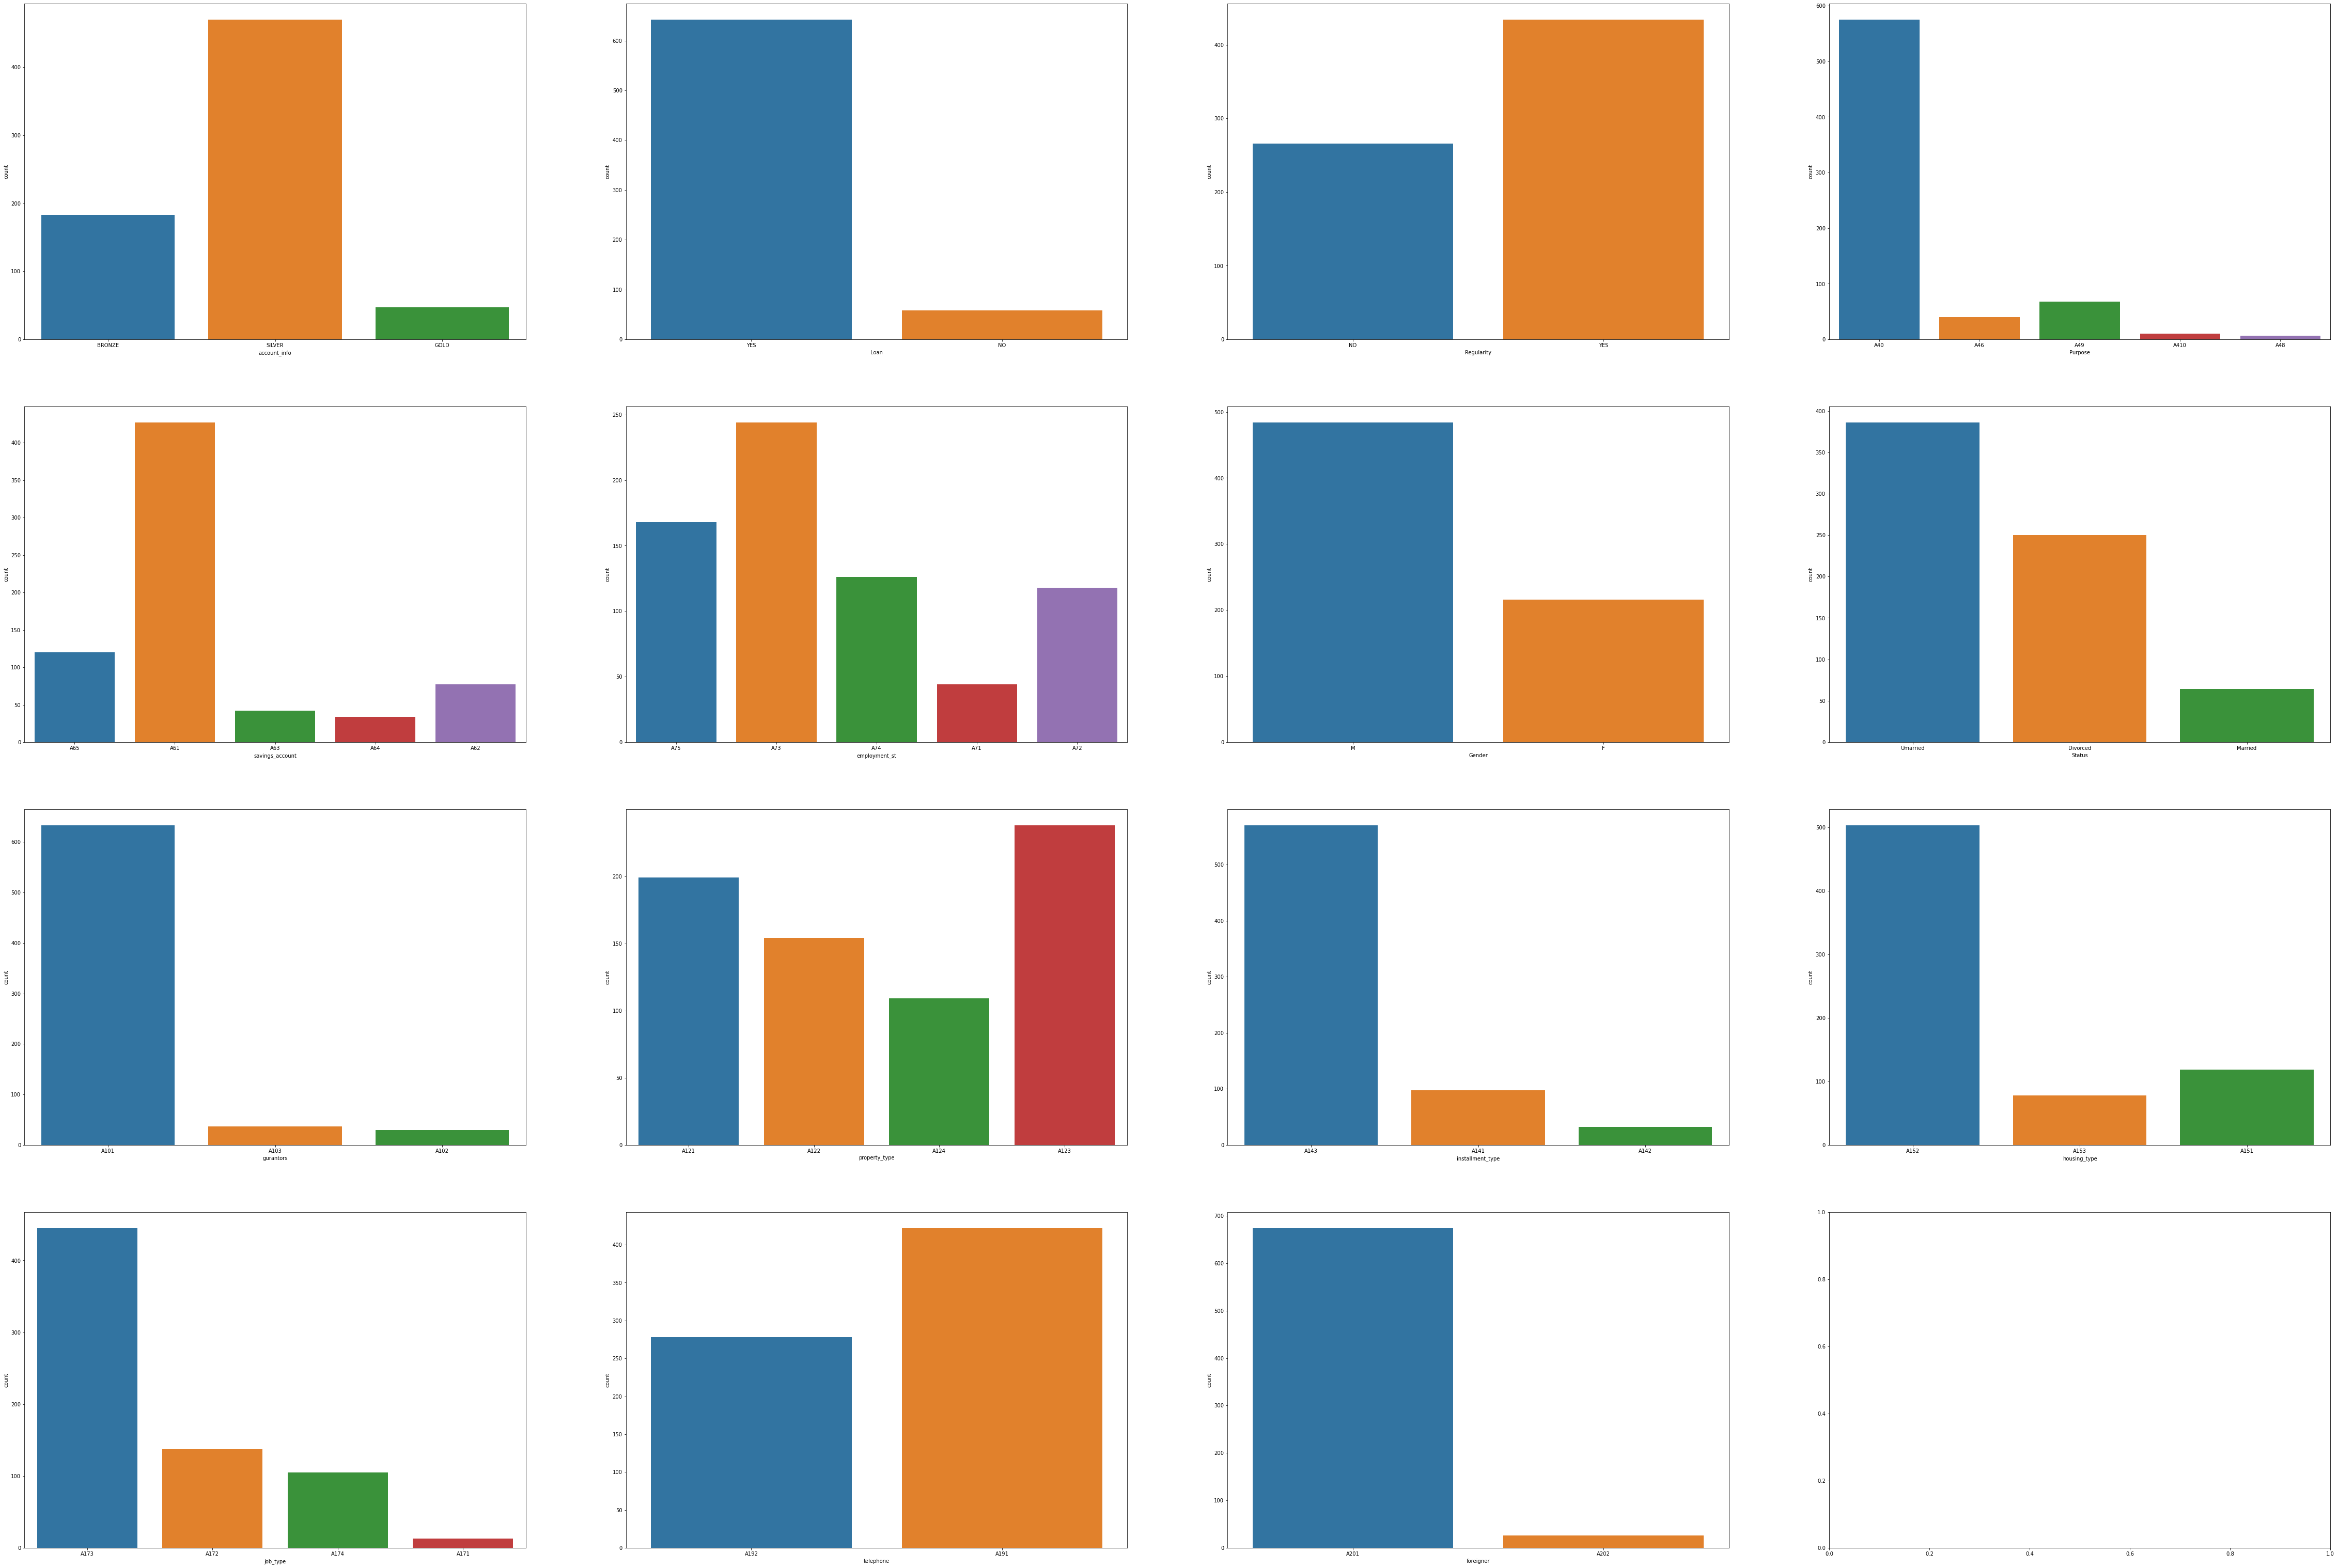

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (80, 55))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_categorical[variable], ax = subplot)

### Understanding the target variable

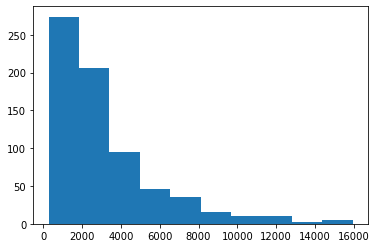

In [27]:
plt.hist(df1['credit_amount'])
plt.show()

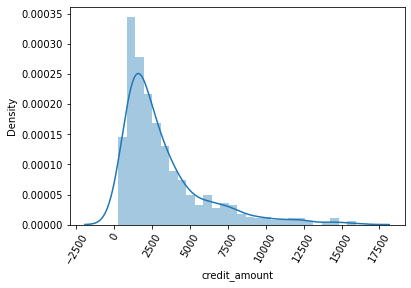

In [28]:
sns.distplot(df1['credit_amount'])
plt.xticks(rotation=60)
plt.show()

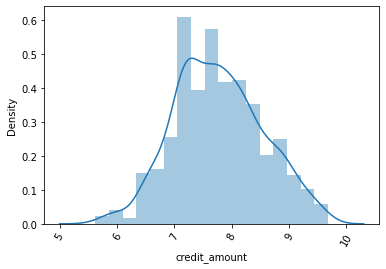

In [29]:
sns.distplot(np.log(df1['credit_amount']))
plt.xticks(rotation=60)
plt.show()

### Checking for Normality

In [30]:
from scipy.stats import shapiro

In [31]:
w1_stat, p1 = shapiro(df1['credit_amount'])
print('Stat1',w1_stat,'p1-value',p1)

w2_stat, p2 = shapiro(np.log(df1['credit_amount']))
print('Stat2',w2_stat,'p2-value',p2)

Stat1 0.7955993413925171 p1-value 9.416215156233648e-29
Stat2 0.992333710193634 p2-value 0.0011309187393635511


### Dropping Id column for further Analysis

In [32]:
df1['serial number'].nunique()

700

In [33]:
df1.drop('serial number',axis=1,inplace=True)
df1.head(2)

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,BRONZE,6,YES,NO,A40,1169,A65,265.208621,A75,852,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,SILVER,48,YES,YES,A40,5951,A61,72.000000,A73,2400,...,2,A121,22,A143,A152,1,A173,1,A191,A201


### Studying correlation
- To check the correlation between numerical variables, compute a correlation matrix and plot a heatmap for the correlation matrix


In [34]:
corr=df1.corr()
corr

,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
duration_month,1.000000,0.634346,-0.039297,-0.050544,0.056986,0.026705,-0.047060,-0.014358,-0.015023
credit_amount,0.634346,1.000000,-0.045051,0.272107,0.042112,0.029258,0.023802,0.037022,0.012145
Saving Account,-0.039297,-0.045051,1.000000,-0.030011,0.030546,0.024807,0.065905,0.015343,-0.025628
Salary,-0.050544,0.272107,-0.030011,1.000000,0.012201,-0.044267,-0.088249,-0.019238,0.083307
investment,0.056986,0.042112,0.030546,0.012201,1.000000,0.050425,0.068886,0.052050,0.071413
resident_since,0.026705,0.029258,0.024807,-0.044267,0.050425,1.000000,0.273753,0.077693,0.071796
age,-0.047060,0.023802,0.065905,-0.088249,0.068886,0.273753,1.000000,0.132760,0.126560
credits_no,-0.014358,0.037022,0.015343,-0.019238,0.052050,0.077693,0.132760,1.000000,0.092303
liables,-0.015023,0.012145,-0.025628,0.083307,0.071413,0.071796,0.126560,0.092303,1.000000


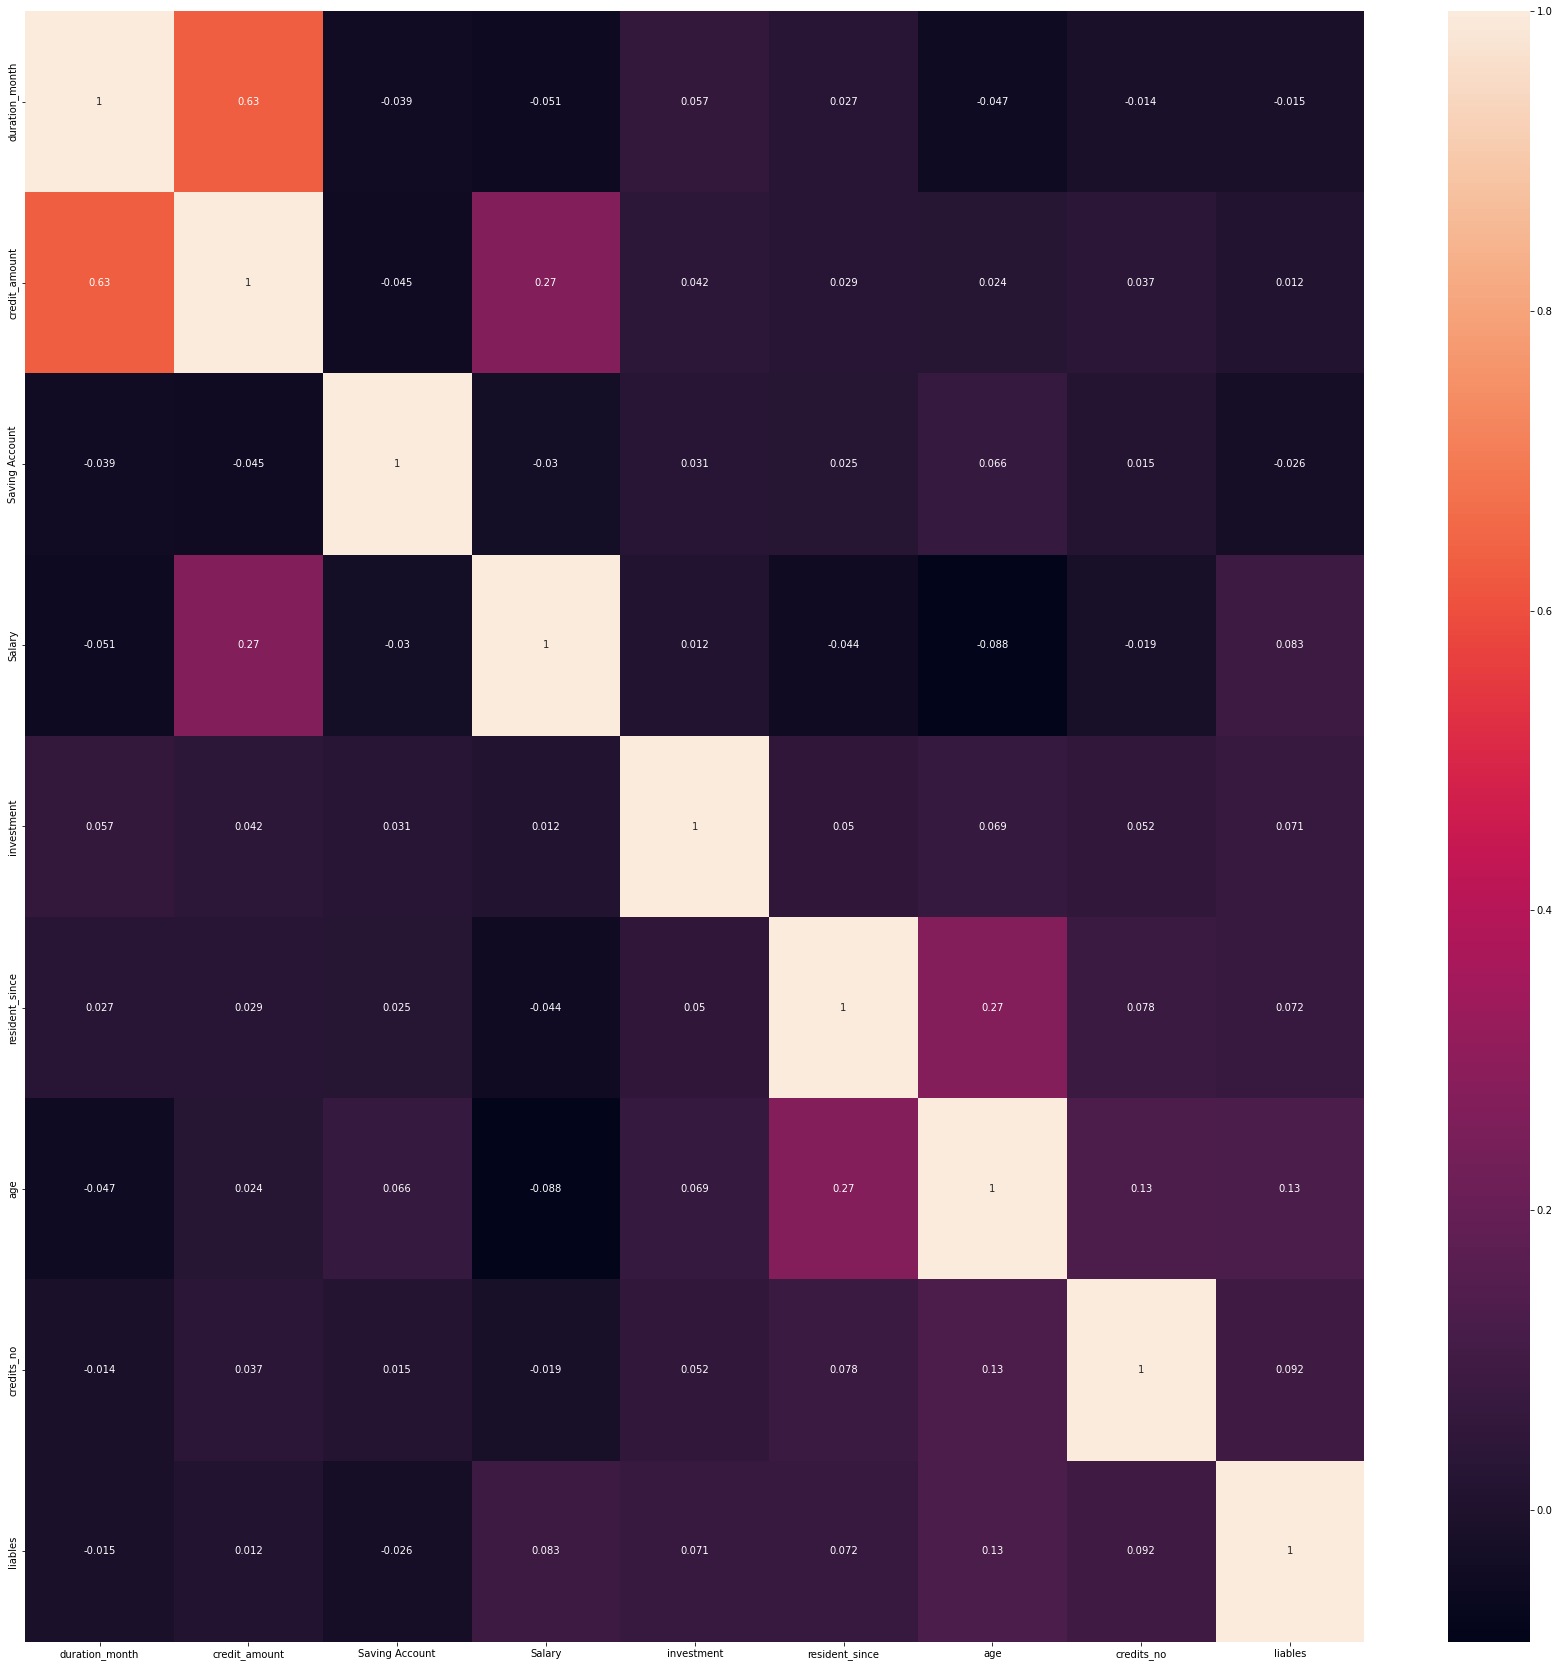

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True)
plt.show()

## Handling Outliers
1. 5 point summary
2. 95% or 97% or 98% or 99% percentile as outliers


In [36]:
df1.describe().T #transpose

,count,mean,std,min,25%,50%,75%,max
duration_month,700.0,20.652857,12.279683,4.00,12.0000,18.00,24.000000,72.00
credit_amount,700.0,3182.331429,2725.319217,276.00,1350.7500,2253.00,3913.250000,15945.00
Saving Account,700.0,265.208621,518.221220,1.00,41.0000,83.00,265.208621,3791.00
Salary,700.0,1610.258571,784.923838,700.00,953.5000,1265.50,2198.250000,3499.00
investment,700.0,39.365286,6.784642,26.01,33.7425,39.57,44.765000,53.61
resident_since,700.0,2.808571,1.114573,1.00,2.0000,3.00,4.000000,4.00
age,700.0,35.322857,11.319842,19.00,27.0000,33.00,41.000000,75.00
credits_no,700.0,1.392857,0.572328,1.00,1.0000,1.00,2.000000,4.00
liables,700.0,1.148571,0.355920,1.00,1.0000,1.00,1.000000,2.00


In [37]:
out_cols_98 = ['duration_month', 'credit_amount', 'Saving Account',
       'Salary', 'investment', 'resident_since', 'age', 'credits_no',
       'liables']
print(out_cols_98)

['duration_month', 'credit_amount', 'Saving Account', 'Salary', 'investment', 'resident_since', 'age', 'credits_no', 'liables']


In [38]:
def oh1(x):
    x = x.clip(upper=x.quantile(0.98))
    return x

In [39]:
df1[out_cols_98] = df1[out_cols_98].apply(oh1)

In [40]:
df1.describe(percentiles=[0.01,0.02,0.03,0.95,0.97,0.98,0.99])

,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,20.430000,3149.176857,253.404678,1608.840286,39.347275,2.808571,35.234286,1.387143,1.148571
std,11.642479,2599.204549,454.273031,781.650776,6.750628,1.114573,11.052973,0.550828,0.355920
min,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
1%,6.000000,391.930000,2.000000,709.970000,26.698000,1.000000,20.000000,1.000000,1.000000
2%,6.000000,569.940000,3.980000,719.000000,27.485600,1.000000,20.980000,1.000000,1.000000
3%,6.000000,638.610000,5.000000,731.000000,27.995800,1.000000,21.000000,1.000000,1.000000
50%,18.000000,2253.000000,83.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
95%,48.000000,8980.800000,990.300000,3173.150000,50.018500,4.000000,58.100000,2.000000,2.000000
97%,48.000000,10625.970000,1955.160000,3325.090000,51.120600,4.000000,63.000000,3.000000,2.000000


In [41]:
def oh2(x):
    x = x.clip(lower=x.quantile(0.02))
    return x

In [42]:
df1[out_cols_98] = df1[out_cols_98].apply(oh2)

### Encode Categorical Variables
- We need to perform label encoding on our categorical variables before we proceed further.

In [43]:
df1.shape

(700, 24)

In [44]:
print(df1_numerical.columns)
print(df1_categorical.columns)

Index(['serial number', 'duration_month', 'credit_amount', 'Saving Account',
       'Salary', 'investment', 'resident_since', 'age', 'credits_no',
       'liables'],
      dtype='object')
Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')


In [45]:
df1.dtypes.value_counts()

object     15
float64     7
int64       2
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
lb=LabelEncoder()
c=df1_categorical.columns
for i in c:
    df1[i] =lb.fit_transform(df1[i])

In [48]:
lb=LabelEncoder()
c=df1_categorical.columns
for i in c:
    df1[i] =lb.fit_transform(df1[i])

In [49]:
df1.dtypes.value_counts()

int64      17
float64     7
dtype: int64

In [50]:
x=df1.drop('credit_amount',axis=1)
y=df1['credit_amount']
print(x.shape)
print(y.shape)

(700, 23)
(700,)


### Model Building

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 23)
(175, 23)
(525,)
(175,)


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [55]:
# Model score - R2_Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.6087601850334332
Testing Score 0.46361381325208895


In [56]:
ypred_m1 = m1.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [58]:
mae = mean_absolute_error(y_test,ypred_m1)
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2s = r2_score(y_test,ypred_m1)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m1.score(x_test,y_test))

MAE 1337.0491540784913
MSE 3161360.7558424883
RMSE 1778.021584751571
R2_score 0.46361381325208895
Model_Score 0.46361381325208895


In [59]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score",'RMSE'])
models

,Model,MAE,MSE,R2 Score,RMSE


In [60]:
new_row = {"Model": "LinearRegression Model-1","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585


In [61]:
df3=df1.copy()

In [62]:
df3.shape

(700, 24)

<AxesSubplot:xlabel='credit_amount', ylabel='Density'>

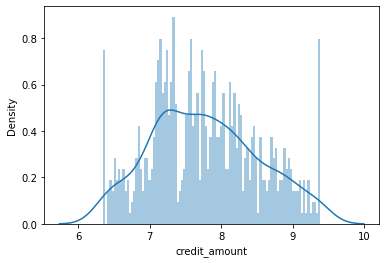

In [63]:
df3['credit_amount'] = np.log(df3['credit_amount'])
sns.distplot(df3['credit_amount'],bins=100)

In [64]:
df3.dtypes.value_counts()

int64      17
float64     7
dtype: int64

In [65]:
x=df3.drop('credit_amount',axis=1)
y=df3['credit_amount']
print(x.shape)
print(y.shape)

(700, 23)
(700,)


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 23)
(175, 23)
(525,)
(175,)


In [67]:
m2 = LinearRegression()
m2.fit(x_train,y_train)

LinearRegression()

In [68]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.6507992792386288
Testing Score 0.5219775679760423


In [69]:
ypred_m2 = m2.predict(x_test)

In [70]:
mae = mean_absolute_error(y_test,ypred_m2)
mse = mean_squared_error(y_test,ypred_m2)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m2))
r2s = r2_score(y_test,ypred_m2)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m2.score(x_test,y_test))

MAE 0.3997509036749836
MSE 0.2495389601739226
RMSE 0.49953874741998
R2_score 0.5219775679760423
Model_Score 0.5219775679760423


In [71]:
m = np.exp(m2.coef_)
c = np.exp(m2.intercept_)
print('Coefficients',m)
print('Intercept',c)

Coefficients [1.02776508 1.03883425 0.94883501 0.89572386 1.00602285 1.02668461
 0.99997425 0.95278963 1.00036858 1.0003948  0.96823432 1.13402299
 1.04316279 1.00720709 1.05613617 1.00132139 1.00268576 0.94385296
 1.00351751 1.21480706 0.97484375 1.15106823 1.0183566 ]
Intercept 373.7884038237196


In [72]:
new_row = {"Model": "LinearReg Model-1 (Log Transformation)","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539


In [73]:
import statsmodels.api as sm

In [74]:
x=df1.drop('credit_amount',axis=1)
y=df1['credit_amount']
print(x.shape)
print(y.shape)

(700, 23)
(700,)


In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 23)
(175, 23)
(525,)
(175,)


In [76]:
x1 = x_train.drop(['investment','Gender','gurantors','foreigner'],axis=1)
y1 = y_train

x1 = sm.add_constant(x1)

m3 = sm.OLS(y1,x1).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          credit_amount   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     41.24
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           7.41e-90
Time:                        22:05:36   Log-Likelihood:                -4636.5
No. Observations:                 525   AIC:                             9313.
Df Residuals:                     505   BIC:                             9398.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2522.6559    701.679     -3.595      0.000   -3901.226   -1144.086
account_info        86.7600     89.236      0.972      0.331     -88.560     262.080
duration_month     129.6369      6.856     18.908      0.000     116.167     143.107
Loan              -400.4675    299.631     -1.337      0.182    -989.144     188.209
Regularity        -303.1815    192.355     -1.576      0.116    -681.096      74.733
Purpose             34.8653     63.385      0.550      0.583     -89.665     159.396
savings_account    143.1139     55.359      2.585      0.010      34.352     251.876
Saving Account      -0.1470      0.188     -0.782      0.435      -0.516       0.222
employment_st     -216.9730     69.175     -3.137      0.002    -352.879     -81.067
Salary               1.1499      0.098     11.777      0.000       0.958       1.342
Status             278.8390     86.307      3.231      0.001     109.274     448.404
resident_since      60.7140     72.406      0.839      0.402     -81.540     202.968
property_type      194.8430     80.353      2.425      0.016      36.976     352.710
age                  6.6206      7.753      0.854      0.394      -8.612      21.853
installment_type   -13.6992    109.134     -0.126      0.900    -228.112     200.713
housing_type        54.2986    159.463      0.341      0.734    -258.995     367.592
credits_no          50.1060    164.663      0.304      0.761    -273.403     373.615
job_type           440.1178    125.465      3.508      0.000     193.620     686.616
liables           -157.2201    225.578     -0.697      0.486    -600.407     285.967
telephone          676.6297    169.023      4.003      0.000     344.555    1008.705
==============================================================================
Omnibus:                      134.503   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.045
Skew:                           1.208   Prob(JB):                     4.09e-89
Kurtosis:                       6.574   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
x=df1.drop('credit_amount',axis=1)
y=df1['credit_amount']
print(x.shape)
print(y.shape)

(700, 23)
(700,)


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 23)
(175, 23)
(525,)
(175,)


In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from warnings import filterwarnings
filterwarnings("ignore")

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [81]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)
    ypred = model.predict(x_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mean_squared_error(y_test,ypred))
    r2s = r2_score(y_test,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
m4= RandomForestRegressor(n_estimators=70,criterion='mse')
gen_metrics(m4,x_train,x_test,y_train,y_test)

Training Score 0.931661441603506
Testing Score 0.36273347053488003
MAE 1352.9327395918367
MSE 3755930.795827521
RMSE 1938.022393014983
R2_Score 0.36273347053488003


In [84]:
ypred_m4 = m4.predict(x_test)
mae = mean_absolute_error(y_test,ypred_m4)
mse = mean_squared_error(y_test,ypred_m4)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m4))
r2s = r2_score(y_test,ypred_m4)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m4.score(x_test,y_test))

MAE 1352.9327395918367
MSE 3755930.795827521
RMSE 1938.022393014983
R2_score 0.36273347053488003
Model_Score 0.36273347053488003


In [85]:
new_row = {"Model": "Random Forest","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539
2,Random Forest,1352.93274,3755930.795828,0.362733,1938.022393


In [86]:
m5= RandomForestRegressor(n_estimators=70,criterion='mse',max_depth=7)
gen_metrics(m5,x_train,x_test,y_train,y_test)

Training Score 0.8980469435172259
Testing Score 0.39128865563620663
MAE 1319.158089544559
MSE 3587631.8280586544
RMSE 1894.104492381203
R2_Score 0.39128865563620663


In [87]:
m6= RandomForestRegressor(n_estimators=40,criterion='mse')
gen_metrics(m6,x_train,x_test,y_train,y_test)

Training Score 0.9296868561244358
Testing Score 0.3919179922282898
MAE 1315.3253171428573
MSE 3583922.634843799
RMSE 1893.1250975156922
R2_Score 0.3919179922282898


In [88]:
from sklearn.linear_model import SGDRegressor

In [89]:
sgd = SGDRegressor(random_state = 10)
sgd_model = sgd.fit(x_train,y_train)
y_pred_sgd = sgd_model.predict(x_test)

In [90]:
gen_metrics(sgd_model,x_train,x_test,y_train,y_test)

Training Score -8.639579777731063e+23
Testing Score -1.0375264630069868e+24
MAE 2195005969682555.0
MSE 6.114988648728705e+30
RMSE 2472850308597086.0
R2_Score -1.0375264630069868e+24


In [91]:
ypred_sgd = sgd.predict(x_test)
mae = mean_absolute_error(y_test,ypred_sgd)
mse = mean_squared_error(y_test,ypred_sgd)
rmse = np.sqrt(mean_squared_error(y_test,ypred_sgd))
r2s = r2_score(y_test,ypred_sgd)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',sgd_model.score(x_test,y_test))

MAE 2195005969682555.0
MSE 6.114988648728705e+30
RMSE 2472850308597086.0
R2_score -1.0375264630069868e+24
Model_Score -1.0375264630069868e+24


In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [93]:
dt = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes= 30)
dt_model = dt.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)
gen_metrics(dt_model,x_train,x_test,y_train,y_test)

Training Score 0.803879818916054
Testing Score -0.07395319176836779
MAE 1636.9652171748048
MSE 6329681.035697405
RMSE 2515.885735818979
R2_Score -0.07395319176836779


In [94]:
ypred_dt = dt.predict(x_test)
mae = mean_absolute_error(y_test,ypred_dt)
mse = mean_squared_error(y_test,ypred_dt)
rmse = np.sqrt(mean_squared_error(y_test,ypred_dt))
r2s = r2_score(y_test,ypred_dt)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',dt_model.score(x_test,y_test))

MAE 1636.9652171748048
MSE 6329681.035697405
RMSE 2515.885735818979
R2_score -0.07395319176836779
Model_Score -0.07395319176836779


In [95]:
from sklearn.tree import plot_tree,export_text


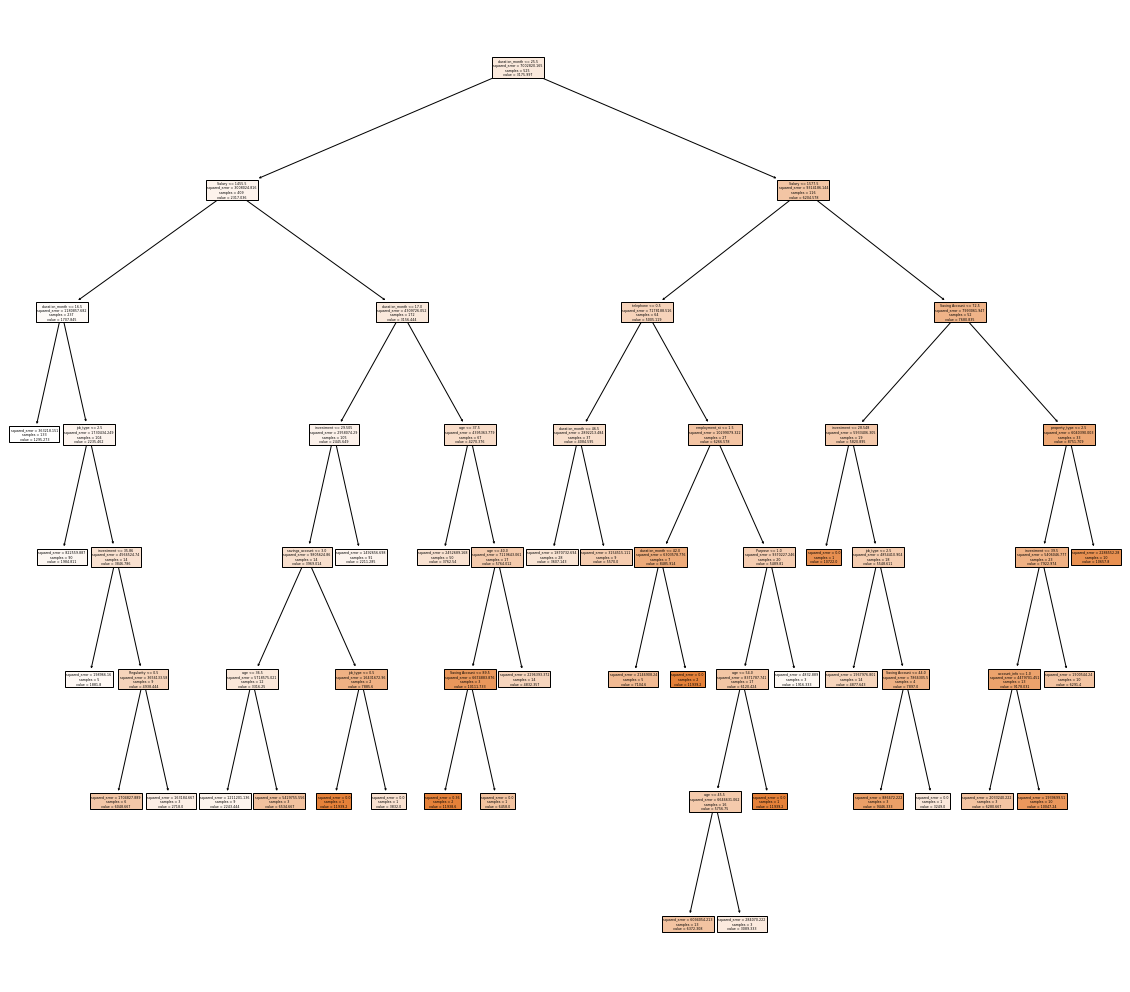

In [96]:
plt.figure(figsize=(20,18))
plot_tree(dt_model,feature_names=x_train.columns,filled=True)
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
tuned_parameters_dt = {"max_depth":[3,5,7,9,10],
                   "max_leaf_nodes":[15,20,25,30,35]}
dt_est = DecisionTreeRegressor(random_state = 10)
grid_tree = GridSearchCV(dt_est,param_grid = tuned_parameters_dt, cv= 10)
dt_grid = grid_tree.fit(x_train, y_train)

In [99]:
print("Hyper Parameters:", dt_grid.best_params_)

Hyper Parameters: {'max_depth': 3, 'max_leaf_nodes': 15}


In [100]:
dt_gscv = DecisionTreeRegressor(max_depth = dt_grid.best_params_.get("max_depth"),
                                max_leaf_nodes= dt_grid.best_params_.get("max_leaf_nodes"))
dt_gscv_model = dt_gscv.fit(x_train,y_train)
y_pred_dt_gscv = dt_gscv_model.predict(x_test)


In [101]:
gen_metrics(dt_gscv_model,x_train,x_test,y_train,y_test)

Training Score 0.5837010575712875
Testing Score 0.2798590717046866
MAE 1437.6575059107658
MSE 4244377.140268796
RMSE 2060.1886176437333
R2_Score 0.2798590717046866


In [102]:
from xgboost import XGBClassifier, XGBRegressor

In [103]:
XGB_model = XGBRegressor(n_estimators=1500,learning_rate=0.05,
 objective= 'reg:squarederror')
XGB_model.fit(x_train, y_train, 
             eval_set=[(x_train, y_train)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [104]:
XGB_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [105]:
XGB_model = XGBRegressor()

In [106]:
gen_metrics(XGB_model,x_train,x_test,y_train,y_test)

Training Score 0.999979751974868
Testing Score 0.3742165997061414
MAE 1378.3502740234374
MSE 3688251.3610971165
RMSE 1920.482064768405
R2_Score 0.3742165997061414


In [107]:
ypred_XGB_model = XGB_model.predict(x_test)
mae = mean_absolute_error(y_test,ypred_XGB_model)
mse = mean_squared_error(y_test,ypred_XGB_model)
rmse = np.sqrt(mean_squared_error(y_test,ypred_XGB_model))
r2s = r2_score(y_test,ypred_XGB_model)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',XGB_model.score(x_test,y_test))

MAE 1378.3502740234374
MSE 3688251.3610971165
RMSE 1920.482064768405
R2_score 0.3742165997061414
Model_Score 0.3742165997061414


In [108]:
new_row = {"Model": "XGB","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539
2,Random Forest,1352.93274,3755930.795828,0.362733,1938.022393
3,XGB,1378.350274,3688251.361097,0.374217,1920.482065


In [109]:
from sklearn.ensemble import AdaBoostRegressor

In [110]:
AdaBoost= AdaBoostRegressor(n_estimators=10)

In [111]:
gen_metrics(AdaBoost,x_train,x_test,y_train,y_test)

Training Score 0.6825143525631727
Testing Score 0.3788284170906505
MAE 1425.1282908121207
MSE 3661070.1643163143
RMSE 1913.3923184533573
R2_Score 0.3788284170906505


In [112]:
ypred_AdaBoost = AdaBoost.predict(x_test)
mae = mean_absolute_error(y_test,ypred_AdaBoost)
mse = mean_squared_error(y_test,ypred_AdaBoost)
rmse = np.sqrt(mean_squared_error(y_test,ypred_AdaBoost))
r2s = r2_score(y_test,ypred_AdaBoost)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',AdaBoost.score(x_test,y_test))

MAE 1425.1282908121207
MSE 3661070.1643163143
RMSE 1913.3923184533573
R2_score 0.3788284170906505
Model_Score 0.3788284170906505


In [113]:
new_row = {"Model": "ADABoost","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539
2,Random Forest,1352.93274,3755930.795828,0.362733,1938.022393
3,XGB,1378.350274,3688251.361097,0.374217,1920.482065
4,ADABoost,1425.128291,3661070.164316,0.378828,1913.392318


In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [115]:
m7 = Lasso(alpha=0.001)
m7.fit(x_train, y_train)
ypred_m7 = m7.predict(x_test)
gen_metrics(m7,x_train,x_test,y_train,y_test)

Training Score 0.6087601850195519
Testing Score 0.4636148204594963
MAE 1337.0462674231358
MSE 3161354.8195487335
RMSE 1778.0199153971064
R2_Score 0.4636148204594963


In [116]:
ypred_m7 = m7.predict(x_test)
mae = mean_absolute_error(y_test,ypred_m7)
mse = mean_squared_error(y_test,ypred_m7)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m7))
r2s = r2_score(y_test,ypred_m7)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m7.score(x_test,y_test))

MAE 1337.0462674231358
MSE 3161354.8195487335
RMSE 1778.0199153971064
R2_score 0.4636148204594963
Model_Score 0.4636148204594963


In [117]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539
2,Random Forest,1352.93274,3755930.795828,0.362733,1938.022393
3,XGB,1378.350274,3688251.361097,0.374217,1920.482065
4,ADABoost,1425.128291,3661070.164316,0.378828,1913.392318
5,Lasso,1337.046267,3161354.819549,0.463615,1778.019915


In [118]:
m9 = Ridge(alpha=0.01)
m9.fit(x_train, y_train)
ypred_m9 = m9.predict(x_test)

gen_metrics(m9,x_train,x_test,y_train,y_test)

Training Score 0.6087601846269717
Testing Score 0.4636164273680239
MAE 1337.0370654563344
MSE 3161345.3487277413
RMSE 1778.0172520894564
R2_Score 0.4636164273680239


In [119]:
ypred_m9 = m9.predict(x_test)
mae = mean_absolute_error(y_test,ypred_m9)
mse = mean_squared_error(y_test,ypred_m9)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m9))
r2s = r2_score(y_test,ypred_m9)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m9.score(x_test,y_test))

MAE 1337.0370654563344
MSE 3161345.3487277413
RMSE 1778.0172520894564
R2_score 0.4636164273680239
Model_Score 0.4636164273680239


In [120]:
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "R2 Score": r2s, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,R2 Score,RMSE
0,LinearRegression Model-1,1337.049154,3161360.755842,0.463614,1778.021585
1,LinearReg Model-1 (Log Transformation),0.399751,0.249539,0.521978,0.499539
2,Random Forest,1352.93274,3755930.795828,0.362733,1938.022393
3,XGB,1378.350274,3688251.361097,0.374217,1920.482065
4,ADABoost,1425.128291,3661070.164316,0.378828,1913.392318
5,Lasso,1337.046267,3161354.819549,0.463615,1778.019915
6,Ridge,1337.037065,3161345.348728,0.463616,1778.017252


In [121]:
train=df3.copy()
train

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,0,6.0,1,0,0,7.063904,4,265.208621,4,852.0,...,4,0,65.0,2,1,2.0,2,1,1,0
1,2,48.0,1,1,0,8.691315,0,72.000000,2,2400.0,...,2,0,22.0,2,1,1.0,2,1,0,0
2,2,12.0,1,0,2,7.647786,0,68.000000,3,2078.0,...,3,0,49.0,2,1,1.0,1,2,0,0
3,0,42.0,1,1,0,8.972337,0,73.000000,3,2380.0,...,4,1,45.0,2,2,1.0,2,2,0,0
4,0,24.0,1,0,0,8.490849,0,52.000000,2,1756.0,...,4,3,53.0,2,2,2.0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2,6.0,1,1,0,7.119636,2,709.000000,2,2198.0,...,4,1,50.0,2,0,1.0,2,1,0,0
696,2,12.0,1,1,0,7.005789,0,36.000000,3,1089.0,...,3,0,29.0,2,1,2.0,2,1,0,1
697,2,12.0,1,0,0,6.830874,0,86.000000,0,3369.3,...,2,1,38.0,2,1,1.0,0,1,0,0
698,2,18.0,1,0,0,7.495542,0,9.000000,2,1138.0,...,2,2,24.0,2,1,2.0,2,1,0,0


In [122]:
test=pd.read_csv("test.csv")
test

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,...,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,...,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,...,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,...,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,...,1,A122,32,A143,A152,1,A173,2,A192,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,NaN,12,YES,YES,A40,A61,77.0,A74,1411,...,4,A121,31,A143,A152,1,A172,1,A191,A201
296,297,BRONZE,30,YES,YES,A40,A61,47.0,A73,1020,...,4,A122,40,A143,A152,1,A174,1,A192,A201
297,298,NaN,12,YES,YES,A40,A61,39.0,A75,1102,...,4,A123,38,A143,A152,1,A173,1,A191,A201
298,299,BRONZE,45,YES,YES,A40,A61,89.0,A73,1167,...,4,A124,23,A143,A153,1,A173,1,A192,A201


In [123]:
test.drop('serial number',axis=1,inplace=True)
test.head(2)

,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,...,4,A123,29,A143,A151,1,A172,1,A191,A201
1,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,...,4,A124,46,A143,A153,2,A173,1,A192,A201


In [124]:
test.columns

Index(['account_info', 'duration_month', 'Loan', 'Regularity', 'Purpose',
       'savings_account', 'Saving Account', 'employment_st', 'Salary',
       'investment', 'Gender', 'Status', 'gurantors', 'resident_since',
       'property_type', 'age', 'installment_type', 'housing_type',
       'credits_no', 'job_type', 'liables', 'telephone', 'foreigner'],
      dtype='object')

In [125]:
test.shape

(300, 23)

In [126]:
x=train.drop('credit_amount',axis=1)

In [127]:
test_categorical= test.select_dtypes(exclude='number')
test_categorical.columns

Index(['account_info', 'Loan', 'Regularity', 'Purpose', 'savings_account',
       'employment_st', 'Gender', 'Status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

In [128]:
lb=LabelEncoder()
c=test_categorical.columns
for i in c:
    test[i] =lb.fit_transform(test[i])

In [129]:
test.isnull().sum()

account_info         0
duration_month       0
Loan                 0
Regularity           0
Purpose              0
savings_account      0
Saving Account      63
employment_st        0
Salary               0
investment           0
Gender               0
Status               0
gurantors            0
resident_since       0
property_type        0
age                  0
installment_type     0
housing_type         0
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
dtype: int64

In [130]:
test['Saving Account'].describe()

count     237.000000
mean      293.164557
std       657.347574
min         1.000000
25%        39.000000
50%        70.000000
75%       109.000000
max      3774.000000
Name: Saving Account, dtype: float64

In [131]:
test['Saving Account'].fillna(293.164557,inplace=True)

In [132]:
ypred_m2 = np.exp(m2.predict(test))
ypred_m2

array([ 1133.49197242,  5888.21595334,  2033.48546444,  2706.01316809,
        2197.44285161,  2369.82411362,  6249.91882368,  1331.45726461,
         794.6424221 ,  1420.20520626,  2546.39318712,   909.41082275,
        2650.88648435,  1046.91432854, 12115.07392499,  7763.38659828,
        4563.49118112,  2381.35085478,  3420.50886173,  2241.10406391,
        1935.69869555,   888.52061313,   816.18588252,   830.49331621,
        2583.53392902,  1182.68571218,  2360.50368286,  1291.40037514,
        5197.34828989,  3545.45574505,  6396.0912187 ,  2248.91937939,
         731.11676742,  3229.69911154,  1809.74020457,  3157.3110805 ,
        4407.42655203,  1874.19454805,  4146.26260818,  2096.53636651,
        3156.58002988,   919.5770756 ,  2140.00352924,  2404.22708719,
        6377.55484954,  1722.59817555,  3107.26909987,   917.86318243,
        5551.25503362,  2228.33183378,  1440.2742439 ,  2482.63580899,
        1559.77292369,  2583.07585908,  1519.67837578,  2050.7867152 ,
      

## Inference
- The log linear regression model has the lowest RMSE score. Thus we use it to make further predictions.

In [133]:
test1=pd.read_csv('test.csv')

In [134]:
test_ID=test1['serial number']

In [135]:
y_test_pred = np.exp(m2.predict(test))

submission = pd.DataFrame()
submission['S.no'] = test_ID
submission['credit_amount'] = y_test_pred 

submission.to_csv('Final.csv',index=False)